# Implementation of ML Algorithms in Python 3.6.5

## 1. k-Nearest Neighbours

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()

In [12]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape", digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


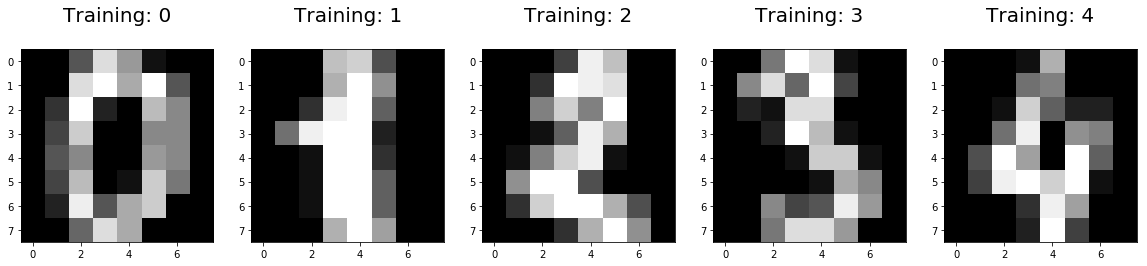

In [13]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [15]:
# all parameters not specified are set to their defaults
KNN = KNeighborsClassifier()

In [16]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [17]:
KNN.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [18]:
predictions = KNN.predict(x_test)

In [29]:
# Use score method to get accuracy of model
score = KNN.score(x_test, y_test)
print(score)
print (accuracy_score(y_test, predictions))

0.98
0.98


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [22]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  1  0  0  1  1 44  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


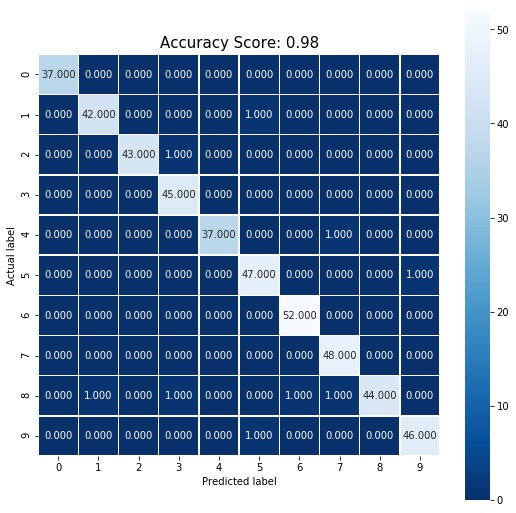

In [23]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);